# Introduction

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957.

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from IPython.core.display import HTML
import iso3166
import phik

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

## Preliminary Data Exploration


In [4]:
df_data.shape

(4324, 9)

In [5]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [6]:
df_data.head(2)

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success

In [7]:
df_data.tail(2)

Unnamed: 0.1  Unnamed: 0 Organisation  \
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                       Location                        Date  \
4322  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Sun Nov 03, 1957 02:30 UTC   
4323  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Fri Oct 04, 1957 19:28 UTC   

                          Detail  Rocket_Status Price Mission_Status  
4322  Sputnik 8K71PS | Sputnik-2  StatusRetired   NaN        Success  
4323  Sputnik 8K71PS | Sputnik-1  StatusRetired   NaN        Success

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [10]:
df_data.duplicated(keep=False).values.any()

np.False_

In [11]:
col_subset = ['Organisation','Location', 'Date', 'Rocket_Status', 'Price', 'Mission_Status']
clean_df = df_data.copy()[col_subset]

In [12]:
# Extract Country from Launch Location
separated_values = clean_df.Location.str.split(',')
clean_df["Country"] = separated_values.str[-1].str.strip() 

In [13]:
# Turn Date values to datetime64 format
clean_df['Date'] = pd.to_datetime(clean_df['Date'], errors='coerce', format='mixed', utc=True)
clean_df['Date'] = clean_df['Date'].dt.normalize()
# Remove timezone information and keep only the date
clean_df['Date'] = clean_df['Date'].dt.tz_localize(None)

In [14]:
# Change Price column to numeric
clean_df["Price"] = pd.to_numeric(clean_df["Price"], errors='coerce')

In [15]:
print(clean_df.dtypes)

Organisation              object
Location                  object
Date              datetime64[ns]
Rocket_Status             object
Price                    float64
Mission_Status            object
Country                   object
dtype: object


In [16]:
# Extract the year from the 'Date' column for future year by year analysis
clean_df['Year'] = clean_df['Date'].dt.year

## Descriptive Statistics

In [17]:
clean_df[['Date', 'Price']].describe()

Date  Price
count                           4324 949.00
mean   1987-11-28 05:24:01.998149824 129.80
min              1957-10-04 00:00:00   5.30
25%              1972-04-19 18:00:00  40.00
50%              1984-12-16 12:00:00  62.00
75%              2002-09-10 12:00:00 164.00
max              2020-08-07 00:00:00 450.00
std                              NaN 143.22

*The dataset covers a wide range of dates from 1957 to 2020. The Price column has significant variation, as indicated by the large standard deviation compared to the mean price. This suggests that the prices in the dataset are spread out over a wide range.Rocket_Status and Launch_Location_Country (0.74) shows a moderate to strong correlation, suggesting that the status of rockets is influenced by the launch location country.

In [18]:
clean_df.columns


Index(['Organisation', 'Location', 'Date', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country', 'Year'],
      dtype='object')

In [19]:
# Correlation between different parameters
interval_cols = ['Price', 'Date']
correlation_matrix=clean_df[['Organisation', 'Location', 'Year', 'Rocket_Status', 'Price',
             'Mission_Status']].phik_matrix(interval_cols=interval_cols)

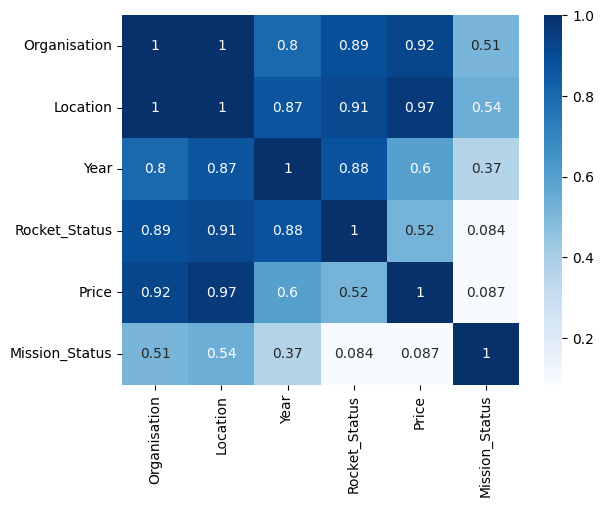

In [20]:
correlation_map = sns.heatmap(correlation_matrix, cmap="Blues", annot=True)

In [ ]:
%%html
<div>
    <img src="assets/correlation_map.png"/>
</div>

**The dataset spans from 1957 to 2020, offering a comprehensive historical perspective on space missions over six decades. The Price column exhibits substantial variability, as evidenced by the large standard deviation relative to the mean, indicating a wide range of costs associated with these missions.**

**Several notable correlations emerge from the analysis:**

- *Price and Location:* A very high correlation (0.97) between Price and Location suggests that the cost of missions is highly dependent on the launch location. This could reflect varying logistical costs, regulatory environments, or regional economic factors impacting mission expenses.

- *Rocket Status and Launch Location Country:* The moderate to strong correlation (0.74) between Rocket_Status and Launch_Location_Country indicates that the success or operational status of rockets is influenced by the country from which they are launched. This could be due to differences in technology, infrastructure, or regulatory standards across countries.

- *Rocket Status and Location:* A strong correlation (0.91) between Rocket_Status and Location further underscores the significance of geographical factors, suggesting that specific launch sites may have better infrastructure or more advanced technology, influencing rocket performance.

- *Temporal and Location-Based Factors:* The correlations between Year and Location (0.86) and Rocket_Status and Year (0.9) suggest that both the choice of launch location and rocket performance have evolved over time. This could reflect advancements in technology, changes in international collaboration, or shifts in strategic priorities in space exploration.

**Overall, the data reveals that both geographical and temporal factors significantly impact the costs and outcomes of space missions, highlighting the complex interplay between location, time, and mission success.**



### Number of Launches per Company

In [21]:
top20_comp = clean_df.Organisation.value_counts()[:20]
top20_comp = top20_comp.index.unique()

In [22]:
# number of space mission launches by organisation
df = clean_df.loc[(clean_df.Organisation.isin(top20_comp))]
mission_by_organisation = df.groupby(['Mission_Status'], as_index=False, sort=False, group_keys=False)  
mission_by_organisation = mission_by_organisation.Organisation.value_counts()
mission_by_organisation.sort_values('count', ascending=False, inplace=True)

In [23]:
top_20_launch_org = px.bar(
    data_frame=mission_by_organisation,  
    x='Organisation',  
    y='count', 
    title='Number of Space Mission Launches by Top 20 Organisations',
    height=650,
    text='count',
    color='Mission_Status'
)

for trace in top_20_launch_org.data:
    if 'Success' in trace.name:
        trace.textposition = 'inside'
    else:
        trace.text = []  # Remove text for other categories
        trace.textposition = 'none'  # Ensure text is not displayed



top_20_launch_org.update_layout(
    xaxis_title='Organisation',
    coloraxis_showscale=False,
    yaxis_title='Number of Space Missions'
)

top_20_launch_org.update_traces(textposition='outside')

In [ ]:
%%html
<div>
    <img src="assets/top_20_launch_org.png"/>
</div>

### Timeline of Space Missions by Organization and Mission Count

In [24]:
# Calculate the count of Mission_Status and the start and end years for each Organisation
dist_over_time = clean_df.groupby(['Organisation'], as_index=False).agg({
    'Mission_Status': 'count',  
    'Date': ['min', 'max']      
})
dist_over_time.columns = ['Organisation', 'Mission_Count', 'Start_Year', 'End_Year']
dist_over_time = dist_over_time.sort_values('Mission_Count', ascending=False)[:20].sort_values('Start_Year')

In [25]:
org_timeline = px.timeline(dist_over_time, x_start="Start_Year", x_end="End_Year", y="Organisation", 
                  color="Mission_Count", 
                  color_continuous_scale="Jet",
                  title= "Timeline of Space Missions by Organization and Total number of Launches")
org_timeline.update_yaxes(autorange="reversed")
org_timeline.update_layout(height=700, width=1000)
org_timeline.show()

In [ ]:
%%html
<div>
    <img src="assets/org_timeline.png"/>
</div>

**The timeline provides a visual representation of the evolution and expansion of space missions by various international organizations, highlighting the increasing participation of private companies in recent years.**

**Key observations from the graph:**

- RVSN USSR shows the longest active period for space missions, with the highest mission count (indicated by the dark red color), suggesting a significant contribution to space exploration, particularly during the Cold War era.
- US Air Force and NASA have also been consistently active over a long period, with a substantial number of missions.
- Newer organizations, such as SpaceX and ULA, have more recent entries into the timeline but show a growing number of missions.

### Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [26]:
rocket_status = clean_df.Rocket_Status.value_counts()

In [27]:
color_map_status = {
    'StatusRetired': '#6482AD',
    'StatusActive': '#E2DAD6'
}

rocket_status = px.pie(
    values=rocket_status.values,
    title='Percentage of Active vs. Retired Rockets',
    hole=0.2,
    names= ["Retired", "Active"],
    color = rocket_status.index,
    color_discrete_map=color_map_status,
    width=600,  
    height=600   
)

rocket_status.update_traces(
    textinfo='label+percent+value', 
    textposition='inside'
)


rocket_status.update_layout(
    uniformtext_minsize=14,
    showlegend=False)

rocket_status.show()

In [ ]:
%%html
<div>
    <img src="assets/rocket_status.png"/>
</div>

### Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [28]:
mission_status = clean_df.Mission_Status.value_counts()

In [29]:
mission_status_distr = px.bar(
        x = mission_status.index,
        y = mission_status.values,
        color = mission_status.values,
        color_continuous_scale="Mint",
        title="Overall Mission Status Distribution",
        height=500,
        width = 900,
        text=mission_status.values)

mission_status_distr.update_layout(xaxis_title='Status',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Missions',
                    bargap=0.5,
                    showlegend=False)

# Update trace to show text on bars
mission_status_distr.update_traces(textposition='outside', marker_color='#161D6F')
mission_status_distr.update_yaxes(range=[0, 4500])

mission_status_distr.show()

In [ ]:
%%html
<div>
    <img src="assets/mission_status_distr.png"/>
</div>

### How Expensive are the Launches? 

In [30]:
# Drop NaN values from the 'Price' column
clean_price_without_nan = clean_df.dropna(subset=['Price'])
price = clean_price_without_nan.Price.value_counts()

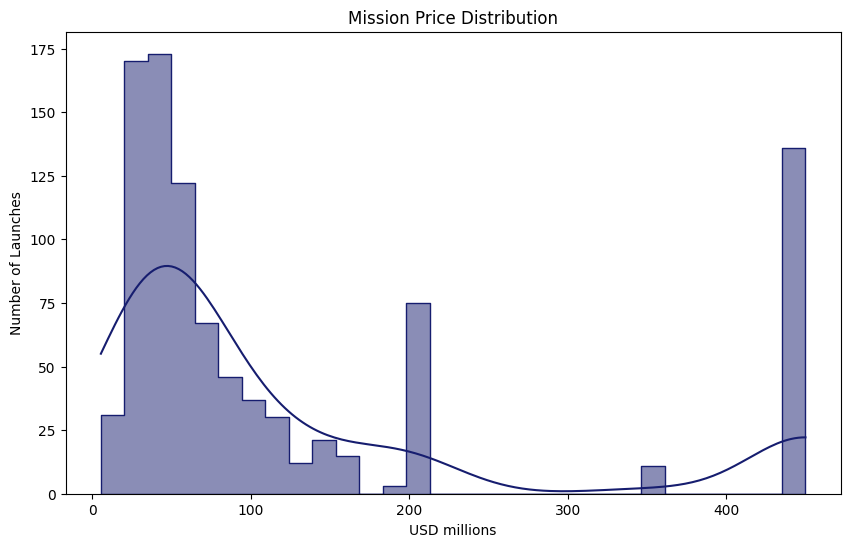

In [31]:
price_distr = sns.histplot(clean_price_without_nan, x ='Price', stat='count', kde=True, fill=True, cumulative=False, bins=40, 
             binwidth=15, element="step", color='#161D6F')
plt.title('Mission Price Distribution')
plt.xlabel("USD millions")
plt.ylabel("Number of Launches")
plt.gcf().set_size_inches(10, 6)

### Number of Launches by Launch Site

In [32]:
df_launch_loc = pd.read_csv('df_launch_sites.csv')

In [33]:
subset_1 = clean_df[['Location', 'Mission_Status', 'Rocket_Status', 'Price', 'Year']]
subset_2 = df_launch_loc[['Location', 'Latitude', 'Longitude', 'Space_Center_Name']]
merged_df = pd.merge(subset_1, subset_2, on="Location", how="outer")

In [34]:
grouped_df = merged_df.groupby(['Space_Center_Name', 'Latitude', 'Longitude', 'Year']).agg({'Mission_Status': 'count'}).reset_index()
grouped_df = grouped_df.sort_values(['Space_Center_Name', 'Latitude', 'Longitude', 'Year'])
grouped_df['Cumulative_Num_Launches'] = grouped_df.groupby(['Space_Center_Name', 'Latitude', 'Longitude'])['Mission_Status'].cumsum()
grouped_df = grouped_df.sort_values("Year")

In [35]:
# Calculate the cumulative sum Launthes for graph

all_years = pd.DataFrame({'Year': range(merged_df['Year'].min(), merged_df['Year'].max() + 1)})
space_centers = merged_df[['Space_Center_Name', 'Latitude', 'Longitude']].drop_duplicates()
all_combinations = pd.merge(space_centers.assign(key=1), all_years.assign(key=1), on='key').drop('key', axis=1)

full_df = pd.merge(all_combinations, grouped_df, on=['Space_Center_Name', 'Latitude', 'Longitude', 'Year'], how='left')
full_df['Mission_Status'] = full_df['Mission_Status'].fillna(0)
full_df = full_df.sort_values(['Space_Center_Name', 'Latitude', 'Longitude', 'Year'])
full_df['Cumulative_Num_Launches'] = full_df.groupby(['Space_Center_Name', 'Latitude', 'Longitude'])['Mission_Status'].cumsum()

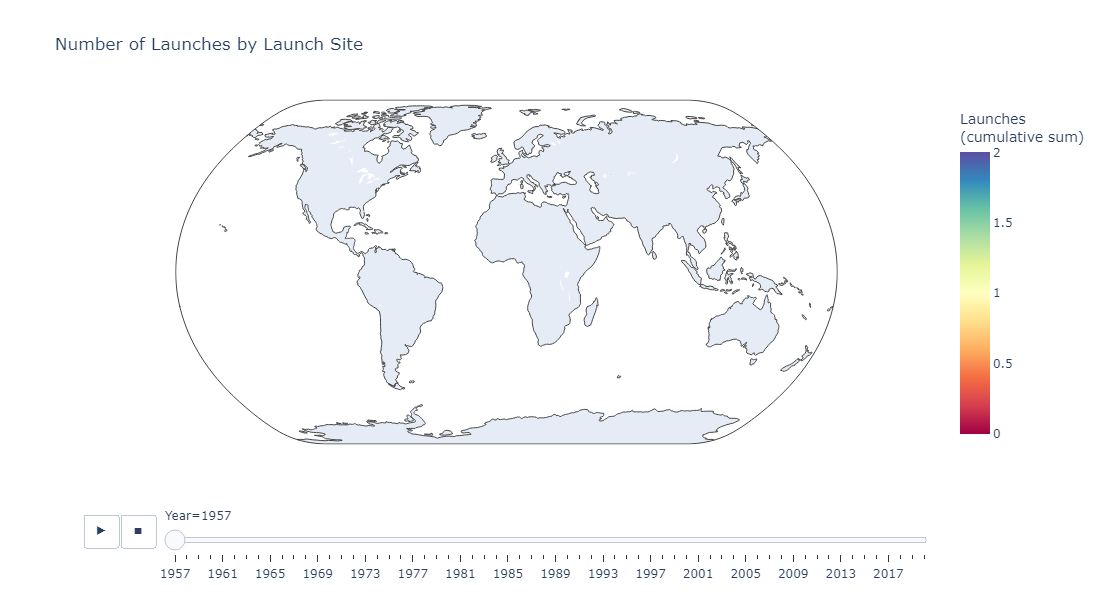

In [36]:
launch_sites = px.scatter_geo(full_df, lat="Latitude", lon="Longitude", color="Cumulative_Num_Launches",
                             color_continuous_scale='spectral', 
                             size_max=30, 
                             projection="natural earth", 
                             height=600,
                             hover_name='Space_Center_Name',
                             hover_data= ['Cumulative_Num_Launches', 'Year'],
                             size="Cumulative_Num_Launches",
                             opacity=0.8,
                             #text='Truncated_Name',
                             animation_group='Year',
                             animation_frame='Year',
                             title="Number of Launches by Launch Site",
                             labels = {'Latitude': '', 'Longitude': '', 'Cumulative_Num_Launches':'Launches<br>(cumulative sum)<br>', 
                                       'Space_Center_Name':'Launch Site', 'Truncated_Name':'', 'Year': 'Year'},
                             #symbol= 'Space_Center_Name'
                              
)

launch_sites.update_traces(textposition='top left', textfont_size=10)
launch_sites.show()

In [ ]:
%%html
<div>
    <img src="assets/launch_sites.png"/>
</div>

### Number of Launches by Country

In [37]:
# Check out the diversity of countries

country_counts = clean_df['Country'].value_counts()
print(country_counts)

Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
Iran                                13
New Zealand                         13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
Barents Sea                          3
Brazil                               3
South Korea                          3
Gran Canaria                         2
Shahrud Missile Test Site            1
Yellow Sea                           1
Pacific Missile Range Facility       1
Name: count, dtype: int64


**In the previously generated list of countries (extracted from the Location column), we observe entries such as:**

- Pacific Missile Range Facility
- Yellow Sea
- Shahrud Missile Test Site

**These locations are rocket launch sites associated with countries like the United States, China, and others.**

**Additionally, some country names, such as Russia, may not be universally recognized by their common names, so it's essential to use their official designations, like the Russian Federation.**

In [38]:
# Change some country names to match the system (to find the correct three letter country code) 
# and according logic (depending on which country used which test site):

dict = {'Russia': 'Russian Federation', 
        'New Mexico': 'USA', 
        'Yellow Sea': 'China', 
        'Shahrud Missile Test Site': 'Iran', 
        'Pacific Missile Range Facility': 'USA', 
        'Barents Sea': 'Russian Federation', 
        'Gran Canaria': 'USA'}

for key, value in dict.items():    
    clean_df['Country'] = np.where(clean_df['Country'] == key, value, clean_df['Country'])


country_counts = clean_df['Country'].value_counts()

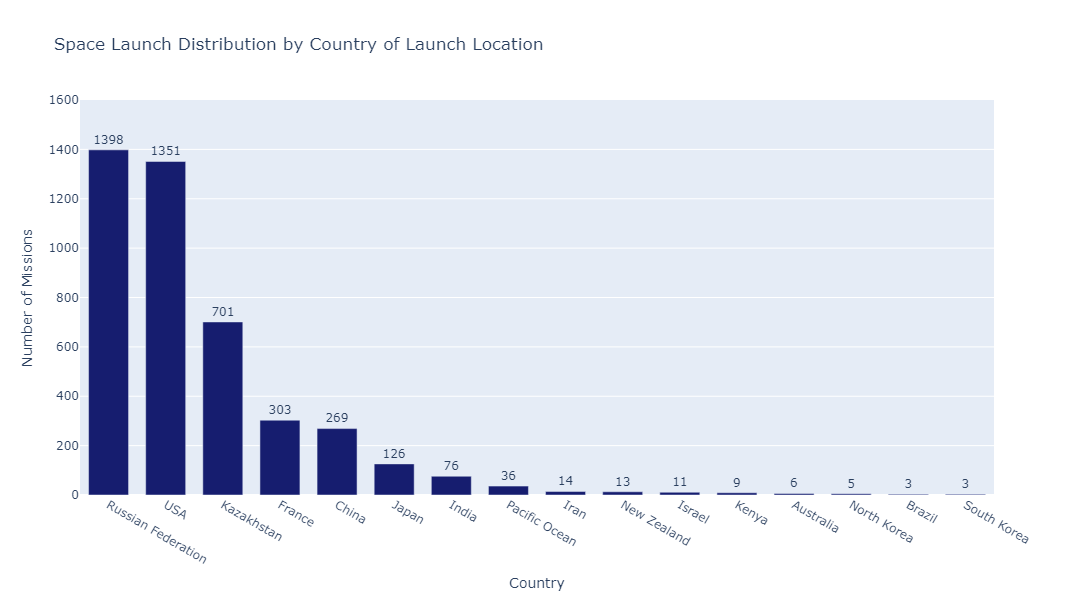

In [103]:
launch_country_launches = px.bar(
        x = country_counts.index,
        y = country_counts.values,
        color = country_counts.values,
        color_continuous_scale="Purp",
        title="Space Launch Distribution by Country of Launch Location",
        height=600,
        text=country_counts.values)

launch_country_launches.update_layout(xaxis_title='Country',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Missions',
                    bargap=0.3,
                    showlegend=False)

# Update trace to show text on bars
launch_country_launches.update_traces(textposition='outside', marker_color='#161D6F')
launch_country_launches.update_yaxes(range=[0, 1600])

launch_country_launches.show()

In [ ]:
%%html
<div>
    <img src="assets/launch_country_launches.png"/>
</div>

- Upon closer examination of the resulting list, **Kazakhstan** ranks **third** in the number of rocket launches.

- Kazakhstan is a **relatively young nation**, having gained independence just over 30 years ago after being a part of the Soviet Union as one of its republics. 

- The renowned **Baikonur Cosmodrome**, now situated in Kazakhstan, played a significant role in these launches. 

- This raises the question: **can all these rocket launches be attributed to Kazakhstan?** 

- To address this, let's **examine the organizations responsible for these launches** from this location.

In [40]:
# Let's check more precisely Baikonur Cosmodrome site in Kazakhstan (former republic of the USSR)

clean_df[clean_df.Country == 'Kazakhstan']['Organisation'].unique()

array(['Roscosmos', 'Arianespace', 'ILS', 'VKS RF', 'Land Launch',
       'Kosmotras', 'Starsem', 'RVSN USSR', 'Yuzhmash', 'OKB-586'],
      dtype=object)

**We observe that five organizations have used this location for rocket launches, each belonging to different countries:**

- **VKS RF**, **Roscosmos**, **RVSN USSR**, **Yuzhmash** - Russian Federation
- **Kosmotras** - a joint project between Russia, Ukraine, and Kazakhstan
- **Arianespace** - a French company
- **International Launch Services** (ILS) - USA

**Therefore, we cannot attribute rocket launch locations solely to the country where the launch occurs.**

**In future analyses of countries responsible for organizing rocket launches, it would be more logical to focus on the organization responsible for the launch and the country to which it belongs.**

In [41]:
clean_df['Organisation'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [42]:
print(f"Total number of organisations - {clean_df['Organisation'].nunique()}")

Total number of organisations - 56


**Let's create a dictionary that maps each organization to its corresponding country, and then update the values in the Country column of our DataFrame based on this dictionary.**

In [43]:
launch_country = {"RVSN USSR": "Russian Federation", "Arianespace": "France", "CASC" : "China", "General Dynamics" : "USA",
                       "NASA": "USA", "VKS RF" : "Russian Federation", "US Air Force": "USA", "ULA": "USA", "Boeing": "USA", "Martin Marietta": "USA",
                       "SpaceX": "USA", "MHI": "Japan", "Northrop" : "USA", "Lockheed" : "USA", "ISRO": "India", "Roscosmos": "Russian Federation", 
                       "ILS":["Russian Federation", "USA"], "Sea Launch": ["Norway","Russian Federation", "Ukraine", "USA"], "ISAS": "Japan", 
                       "Kosmotras": ["Russian Federation", "Ukraine", "Kazakhstan"], "US Navy": "USA", "ISA":"Iran", "Rocket Lab" : "USA", 
                       "Eurockot": ["Russian Federation", "Germany"], "ESA" : "European Union", "Blue Origin": "USA", "IAI" : "Israel", "ExPace": "China", 
                       "ASI": "Italy", "CNES": "France", "AMBA": "United Kingdom", "MITT": "Russian Federation", "JAXA": "Japan", 
                       "Land Launch" : ["Russian Federation", "Ukraine"], "UT": "USA", "KCST" : "North Korea", "CASIC": "China", "Exos": "USA", 
                       "CECLES": "France", "Arm??e de l'Air": "France", "KARI": "South Korea", "SRC": "Russian Federation", "AEB": "Brazil", 
                       "RAE": "United Kingdom", "OKB-586": "Russian Federation", "Yuzhmash": "Russian Federation", "Landspace": "China",
                       "Douglas": "USA", "EER": "USA", "Starsem": ["Russian Federation", "France"], "Virgin Orbit": "USA", "IRGC": "Iran", 
                       "i-Space": "China", "OneSpace":"China", "Sandia": "USA", "Khrunichev": "Russian Federation"}

In [46]:
# Filter the DataFrame for national launches and ensure it's a copy
single_nation_launch = clean_df[clean_df['Launch_Type'] == 'National'].copy()

In [44]:
clean_df.rename(columns={'Country': 'Launch_Location_Country'}, inplace=True)

def get_country_string(org):
    countries = launch_country.get(org, [])
    if isinstance(countries, list):
        return ', '.join(countries)
    elif isinstance(countries, str):
        return countries
    return ''

def set_launch_type(org_country):
    if ',' in org_country:
        return 'International'
    elif "European Union" in org_country:
        return 'International'
    else:
        return 'National'

clean_df['Organization_Country'] = clean_df['Organisation'].apply(get_country_string)
clean_df['Launch_Type'] = clean_df['Organization_Country'].apply(lambda x: set_launch_type(x))
organisation_related_country = clean_df['Organization_Country'].value_counts()

In [47]:
# Convert 'Organization_Country' to ISO3 codes only for national launches

def get_alpha3_code(country_name):
    if country_name == "Iran":
        country_name ='Iran, Islamic Republic of'
    elif country_name == "North Korea":
        country_name = "Korea, Democratic People's Republic of"
    elif country_name == "South Korea":
        country_name = 'Korea, Republic of'
    elif country_name == "United Kingdom":
        country_name = 'United Kingdom of Great Britain and Northern Ireland'
        
    country_name = country_name.upper()

    for value in iso3166.countries_by_name.values():
        if value.name.upper() == country_name:
            return value.alpha3
        elif value.alpha3 == country_name:
            return country_name
        elif value.apolitical_name.upper() == country_name:
            return value.alpha3
    
    # If no match is found
    return None  

In [49]:
clean_df['ISO_launch_country'] =  clean_df['Launch_Location_Country'].apply(get_alpha3_code)

In [48]:
clean_df['ISO_org_country'] = clean_df['Organization_Country'].apply(get_alpha3_code)

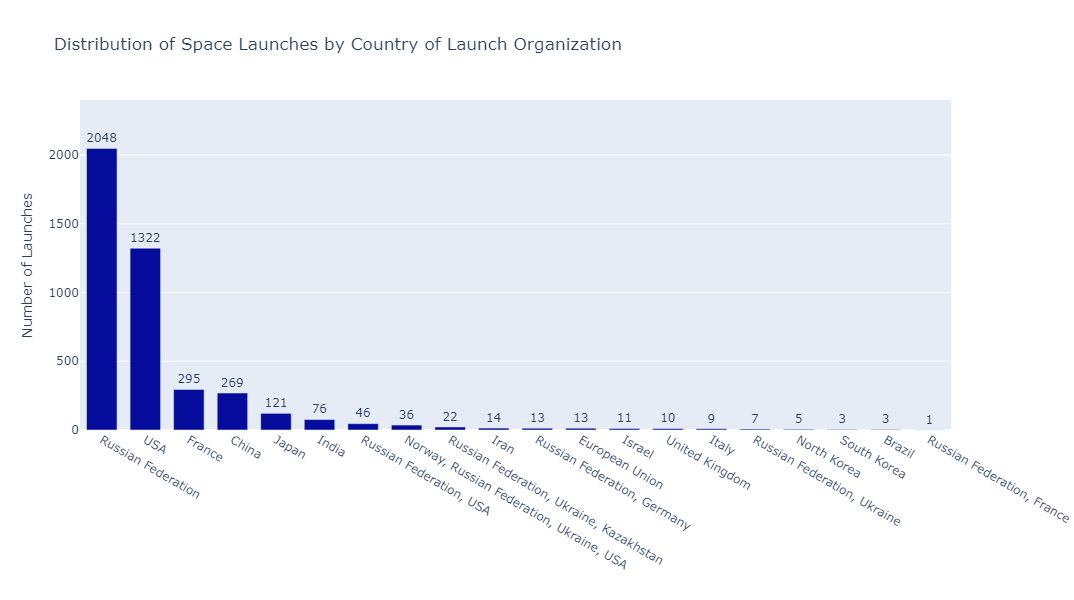

In [105]:
country_org_launch = px.bar(
        x = organisation_related_country.index,
        y = organisation_related_country.values,
        color = organisation_related_country.values,
        color_continuous_scale="Purp",
        title="Distribution of Space Launches by Country of Launch Organization",
        height=600,
        text=organisation_related_country.values)

country_org_launch.update_layout(coloraxis_showscale=False,
                  yaxis_title='Number of Launches',
                  xaxis_title='',
                  bargap=0.3,
                  showlegend=False)

# Update trace to show text on bars
country_org_launch.update_traces(textposition='outside', marker_color='#050C9C')
country_org_launch.update_yaxes(range=[0, 2400])

country_org_launch.show()

In [106]:
%%html
<div>
    <img src="assets/country_org_launch.png"/>
</div>

**The new column, which delineates the countries associated with each organization responsible for the missions, provides a more comprehensive overview of the distribution of space missions across different nations.**

### Choropleth Map to Show the Number of Failures by Country

In [109]:
num_failures = clean_df.query("Mission_Status == 'Failure' or Mission_Status == 'Partial Failure' or Mission_Status == 'Prelaunch Failure'")
failure_counts = num_failures[['Organization_Country', 'ISO_org_country']].value_counts().reset_index()
failure_counts.columns = ['Organization_Country', 'ISO_org_country', 'Failure_Count']

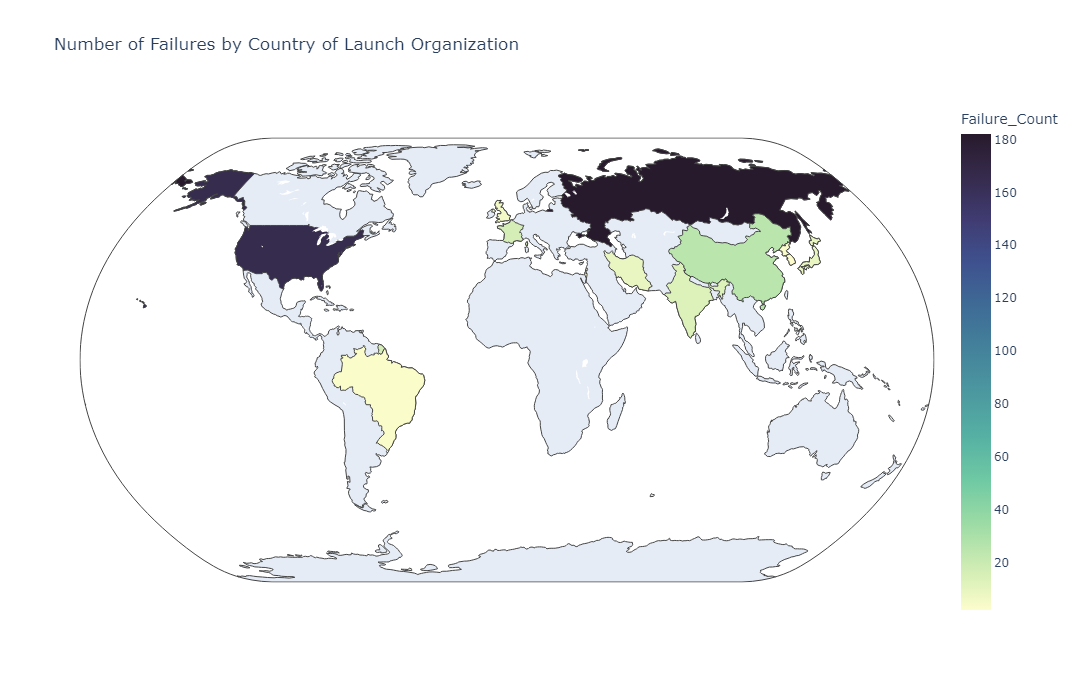

In [114]:
fail_mission_country = px.choropleth(failure_counts, locations="ISO_org_country", 
                    color='Failure_Count', 
                    hover_name="Organization_Country", 
                    projection='natural earth',
                    color_continuous_scale=px.colors.sequential.deep,
                    title='Number of Failures by Country of Launch Organization')

fail_mission_country.update_layout(height=700,
                  width = 1000)
fail_mission_country.show()

In [ ]:
%%html
<div>
    <img src="assets/fail_mission_country.png"/>
</div>

### Sunburst Chart of the countries, organisations, and mission status. 

In [52]:
country_org_status = clean_df.groupby(by=['Organization_Country', 
                                          'Organisation', 
                                          'Mission_Status'], as_index=False).agg({'Date': pd.Series.count})

country_org_status = country_org_status.sort_values('Date', ascending=False)
country_org_status

Organization_Country      Organisation   Mission_Status  Date
53    Russian Federation         RVSN USSR          Success  1614
17                France       Arianespace          Success   269
4                  China              CASC          Success   231
84                   USA  General Dynamics          Success   203
61    Russian Federation            VKS RF          Success   188
..                   ...               ...              ...   ...
112                  USA                UT          Success     1
113                  USA      Virgin Orbit          Failure     1
115       United Kingdom              AMBA  Partial Failure     1
117       United Kingdom               RAE          Failure     1
118       United Kingdom               RAE          Success     1

[119 rows x 4 columns]

In [53]:
burst = px.sunburst(country_org_status, 
                    path=['Organization_Country', 'Organisation', 'Mission_Status'], 
                    values='Date',
                    title='Countries, Organisations, and Mission status',
                    color='Mission_Status',
                    color_discrete_map = {"Success": "#F4D9D0", "Failure" : "#921A40", "Partial Failure": "#C75B7A", "Prelaunch Failure": "#D9ABAB"},
                    # color='Date',
                    # color_continuous_scale='dense',
                    hover_data=['Organization_Country','Organisation', 'Mission_Status', 'Date'])

burst.update_layout(xaxis_title='Mission status', 
                    yaxis_title='City',
                    coloraxis_showscale=False,
                    height=700,
                    width = 1100)
burst.show()

In [ ]:
%%html
<div>
    <img src="assets/burst.png"/>
</div>

### Total Amount of Money Spent by Organisation on Space Missions

In [54]:
# Find launches with not null price
not_null_price = clean_df.loc[clean_df['Price'].notnull() & (clean_df['Price'] != 0)]

In [55]:
organisation_spent = not_null_price.groupby(by=['Organisation'], as_index=False).agg({'Price': 'sum'}).sort_values('Price',  ascending=True)

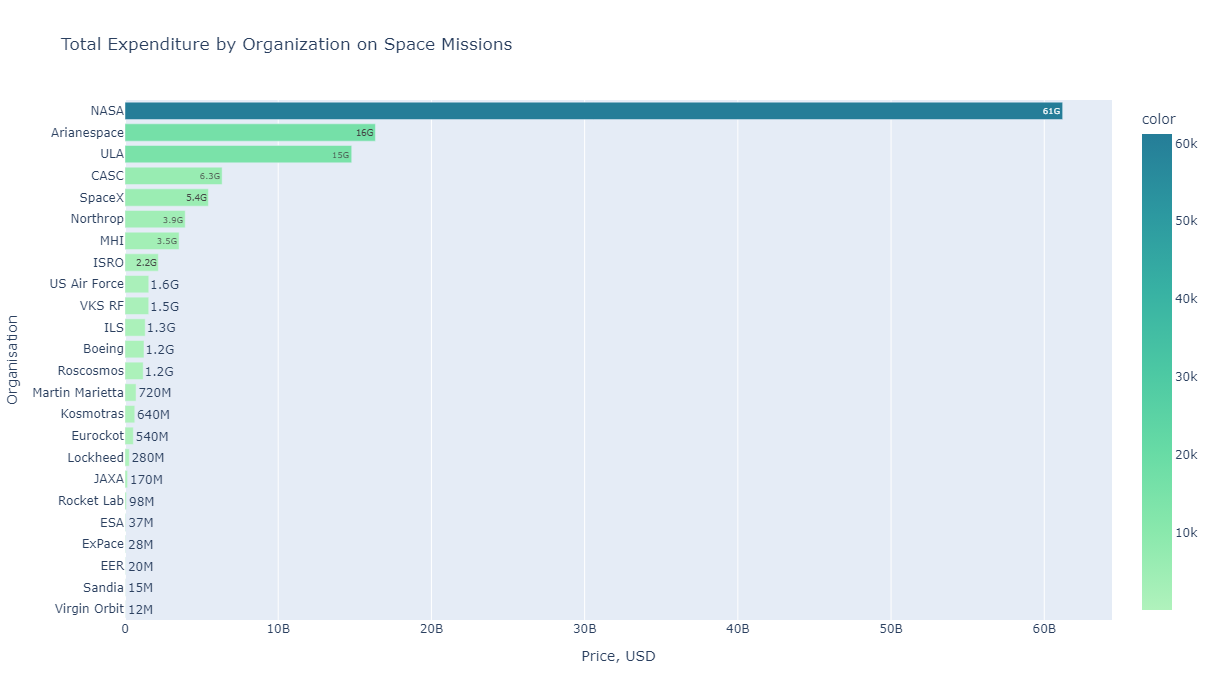

In [115]:
total_expend = px.bar(x = organisation_spent.Price*1000000,
               y = organisation_spent.Organisation,
               orientation='h',
               title="Total Expenditure by Organization on Space Missions",
               text_auto='.2s',
               height = 700,
               color= organisation_spent.Price, color_continuous_scale=px.colors.sequential.Tealgrn)

total_expend.update_layout(xaxis_title='Price, USD', yaxis_title='Organisation')
total_expend.show()

In [ ]:
%%html
<div>
    <img src="assets/total_expend.png"/>
</div>

**The data on mission prices is incomplete, with only 964 out of 4,324 values available, as previously noted in the descriptive statistics. Therefore, our analysis is limited to the information provided by 12 companies**

### Amount of Money Spent by Organisation per Launch

In [57]:
not_null_price.loc[:, "Price"] = not_null_price["Price"]
mean_price_per_launch = not_null_price.groupby(["Organisation"],  as_index=False).agg({'Price': 'mean'}).sort_values('Price',  ascending=True)

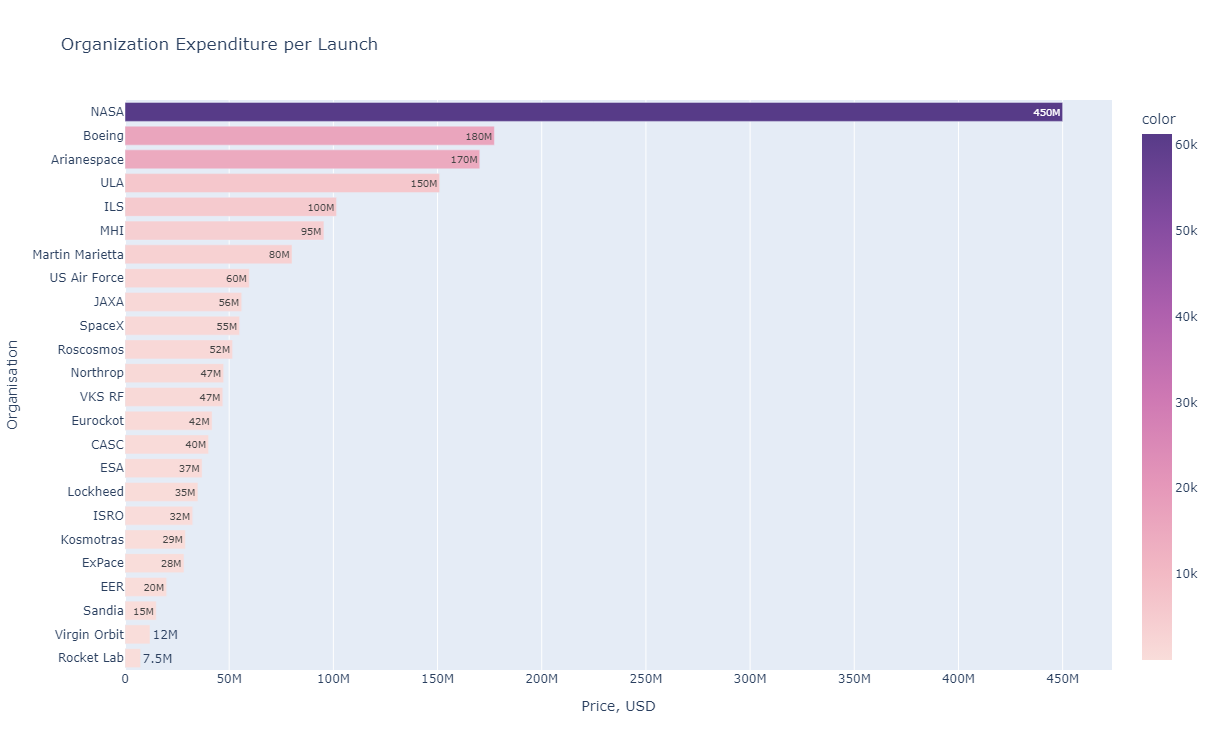

In [117]:
price_per_launch = px.bar(x = mean_price_per_launch.Price*1000000,
               y = mean_price_per_launch.Organisation,
               orientation='h',
               title="Organization Expenditure per Launch",
               text_auto='.2s',
               height = 750,
               color= organisation_spent.Price, color_continuous_scale=px.colors.sequential.Purpor)

price_per_launch.update_layout(xaxis_title='Price, USD', yaxis_title='Organisation')
price_per_launch.show()

In [ ]:
%%html
<div>
    <img src="assets/price_per_launch.png"/>
</div>

### Chart the Number of Launches per Year

In [59]:
launches_per_year = clean_df['Year'].value_counts().sort_index(ascending=True)

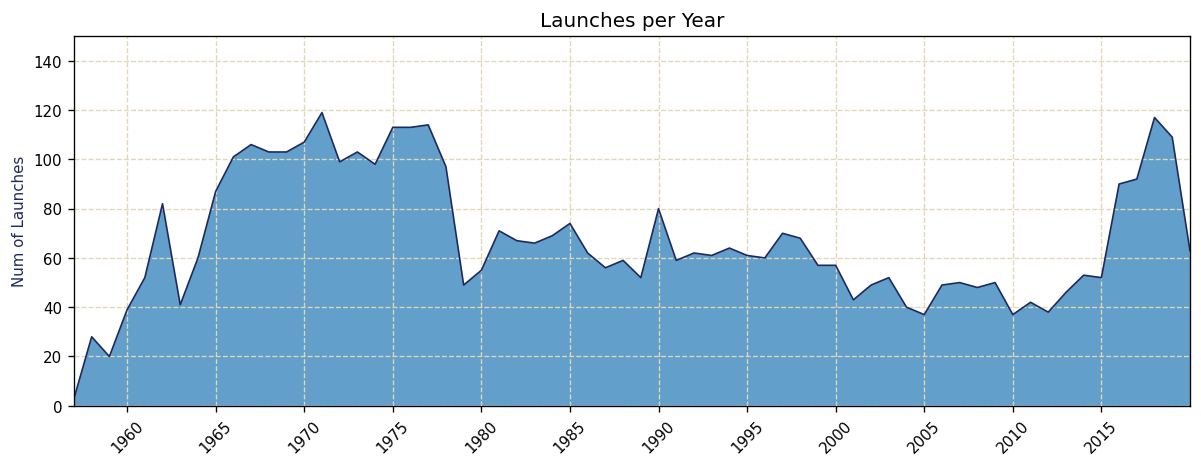

In [60]:
plt.figure(figsize=(12,4), dpi=120)

plt.title('Launches per Year', fontsize=12)
plt.xticks(ticks=np.arange(1960, 2020, step=5), fontsize=9, rotation=45)
plt.yticks(fontsize=9)

ax1 = plt.gca()
ax1.set_ylabel('Num of Launches', color='#1E2A5E', fontsize=9)
ax1.set_ylim(bottom=0, top=150)
ax1.set_xlim([launches_per_year.index.min(), launches_per_year.index.max()])
ax1.grid(color='#E1D7B7', linestyle='--')
ax1.fill_between(launches_per_year.index, 0, launches_per_year.values, alpha=0.7)

# Plot
ax1.plot(launches_per_year.index, launches_per_year.values, 
          color='#1E2A5E', linewidth=1, linestyle='-')

plt.show()

### Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [61]:
# Create df with data and amount of launches
launches_per_date = clean_df.Date.value_counts()
launches_per_date = pd.DataFrame({"date" : launches_per_date.index,
                                 "launches" : launches_per_date.values})

In [62]:
# Find launches per month
launches_per_month = launches_per_date.resample('ME', on='date').sum()
launches_per_month = launches_per_month.reset_index()
launches_per_month.rename(columns={'index': 'date'}, inplace=True)

In [63]:
# Find the max number of launches
max_launches = launches_per_month['launches'].max()
max_launches_row = launches_per_month.loc[launches_per_month['launches'] == max_launches]

# Print the statement with the highest number of launches, month, and year
print(f"The largest number of launches in all time was {max_launches} in {max_launches_row.date.dt.month.values[0]}/{max_launches_row.date.dt.year.values[0]}.")

The largest number of launches in all time was 18 in 12/1971.


*Graph creation*

In [64]:
# To smooth graph line - count 6 months rolling average of the number of launches
roll_launches_per_month = launches_per_month["launches"].rolling(window=6).mean()
roll_launches_per_month

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
750   9.67
751   9.17
752   7.67
753   8.67
754   7.67
Name: launches, Length: 755, dtype: float64

In [65]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

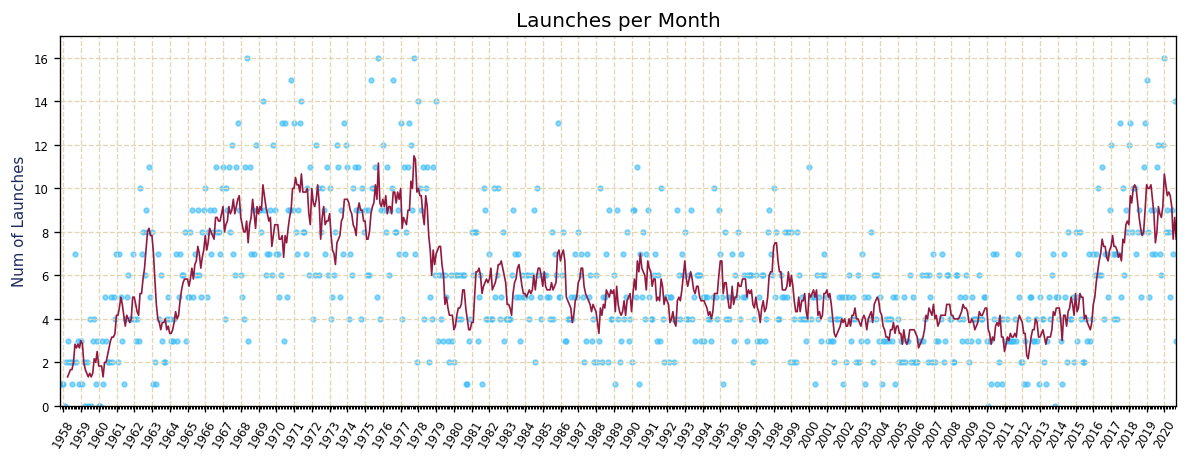

In [66]:
# Create plot + scatter plot
plt.figure(figsize=(12,4), dpi=120)

plt.title('Launches per Month', fontsize=12)
plt.xticks(ticks=np.arange(1958, 2020, step=5), fontsize=7, rotation=60)
plt.yticks(fontsize=7)

ax1 = plt.gca()
ax1.set_ylabel('Num of Launches', color='#1E2A5E', fontsize=9)
ax1.set_ylim(bottom=0, top=17)
ax1.set_xlim([launches_per_month.date.min(), launches_per_month.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.grid(color='#E1D7B7', linestyle='--')

# Plot (6 months rolling average of the number of launches)
ax1.plot(launches_per_month.date, 
         roll_launches_per_month.values, 
         color='#921A40', linewidth=1, linestyle='-')

# Scatter plot
ax1.scatter(x=launches_per_month.date,
            y=launches_per_month.launches,
            c='#3ABEF9',
            alpha=0.6,
            s=8)

plt.show()

### Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [67]:
# Create 'month' column
launches_per_month["month"] = launches_per_month.date.dt.month
launches_per_month['month'] = pd.to_datetime(launches_per_month['month'], format='%m').dt.strftime('%B')

In [68]:
# Find sum of launches by month
sum_month_launches = (launches_per_month
                      .groupby(['month'], as_index=False)
                      .agg({"launches": "sum"})
                      .sort_values('launches', ascending=False))

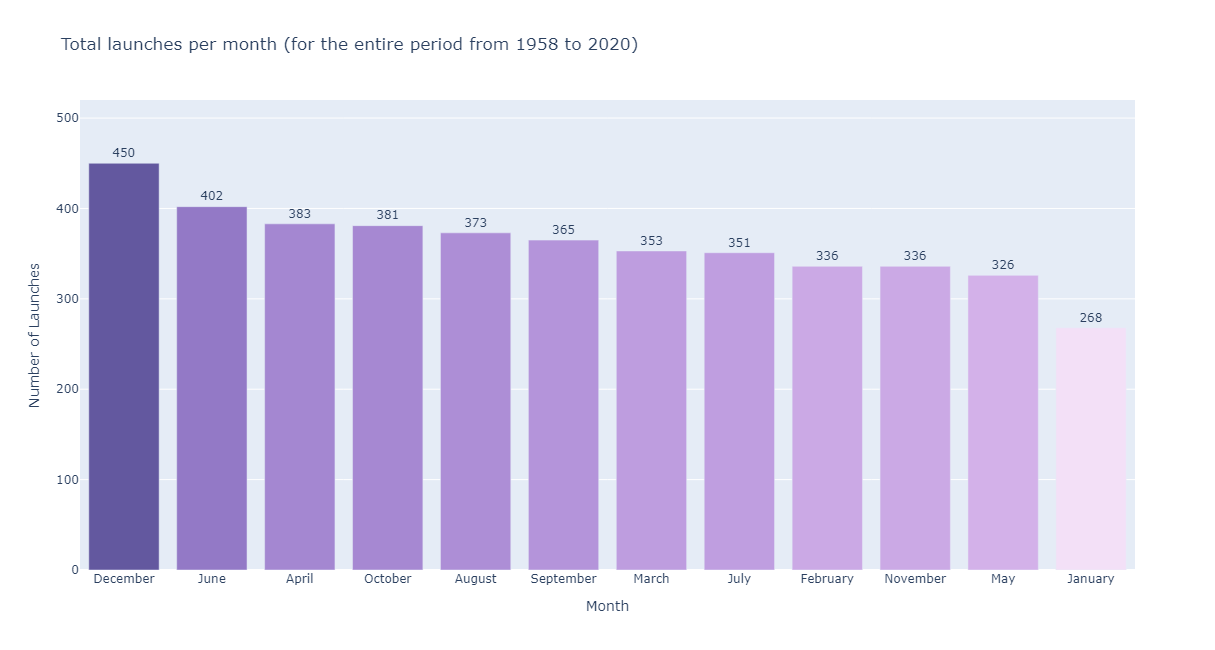

In [118]:
month_launches = px.bar(
    sum_month_launches,  
    x='month',  
    y='launches',
    color='launches',
    color_continuous_scale="Purp",
    title="Total launches per month (for the entire period from 1958 to 2020)",
    height=650,
    text='launches',
)

month_launches.update_layout(
    coloraxis_showscale=False,
    yaxis_title='Number of Launches',
    xaxis_title='Month',
    bargap=0.2,
    showlegend=False
)

month_launches.update_traces(textposition='outside')
month_launches.update_yaxes(range=[0, 520])
month_launches.show()

In [ ]:
%%html
<div>
    <img src="assets/month_launches.png"/>
</div>

**The analysis indicates that the most favorable weather conditions for launches occur in December, June, and April, while the least favorable conditions are observed in May and January.**


### Change in Launch Price over Time


In [70]:
# Filter df on 0 prices and count avg price 
filtered_df = clean_df[clean_df["Price"] > 0]
avg_launch_price_by_year = filtered_df.groupby(["Year"])["Price"].mean()

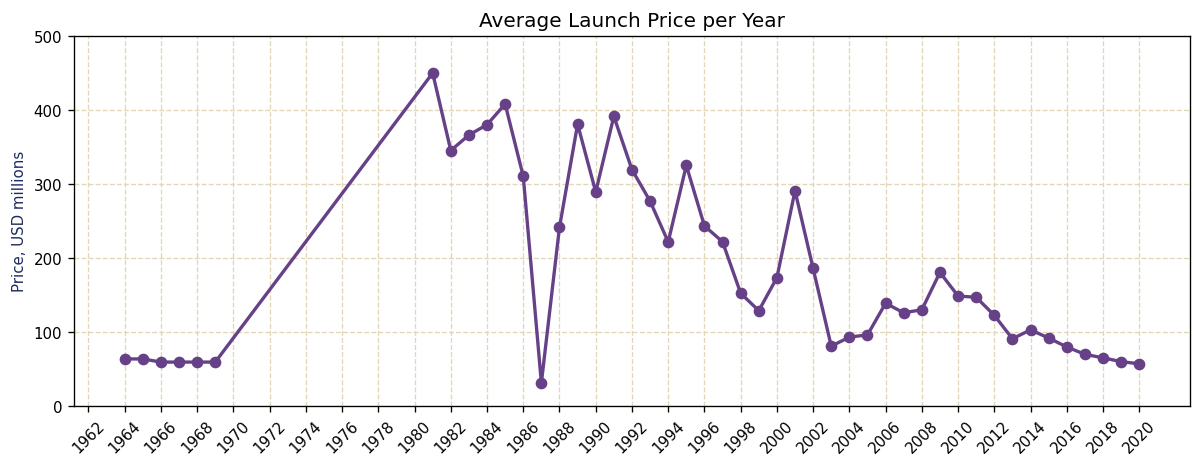

In [71]:
plt.figure(figsize=(12,4), dpi=120)

plt.title('Average Launch Price per Year', fontsize=12)
plt.xticks(ticks=np.arange(1958, 2021, step=2), fontsize=9, rotation=45)
plt.yticks(fontsize=9)


ax1 = plt.gca()
ax1.set_ylim(bottom=0, top=500)
ax1.set_ylabel('Price, USD millions', color='#1E2A5E', fontsize=9)
ax1.grid(color='#E1D7B7', linestyle='--')

ax1.plot(avg_launch_price_by_year.index, 
         avg_launch_price_by_year.values, 
         color='#674188', linewidth=2, linestyle='-',
         marker='o')


plt.show()

### Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [72]:
# extract top 10 organisations from previous series
mission_by_organisation.index

RangeIndex(start=0, stop=57, step=1)

In [73]:
organizations = ['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA', 'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta']

In [74]:
filtered_df = clean_df[clean_df["Organisation"].isin(organizations)]

In [75]:
top_10_org = filtered_df.groupby(["Year", "Organisation"], as_index=False).count()
top_10_org = top_10_org[['Mission_Status',"Year", "Organisation"]].sort_values('Year', ascending=True)

In [76]:
# Create a series that has the cumulative sum for the number of launches.

cumulative_launches = top_10_org.groupby(by=["Year", "Organisation"]).sum().groupby(level=[1]).cumsum()
cumulative_launches.reset_index(inplace=True)
cumulative_launches.sort_values('Mission_Status')

Year      Organisation  Mission_Status
48   1969              CASC               1
263  2006               ULA               1
4    1959  General Dynamics               1
54   1970              CASC               2
1    1958              NASA               2
..    ...               ...             ...
178  1991         RVSN USSR            1765
185  1992         RVSN USSR            1774
206  1995         RVSN USSR            1775
212  1996         RVSN USSR            1776
223  1998         RVSN USSR            1777

[323 rows x 3 columns]

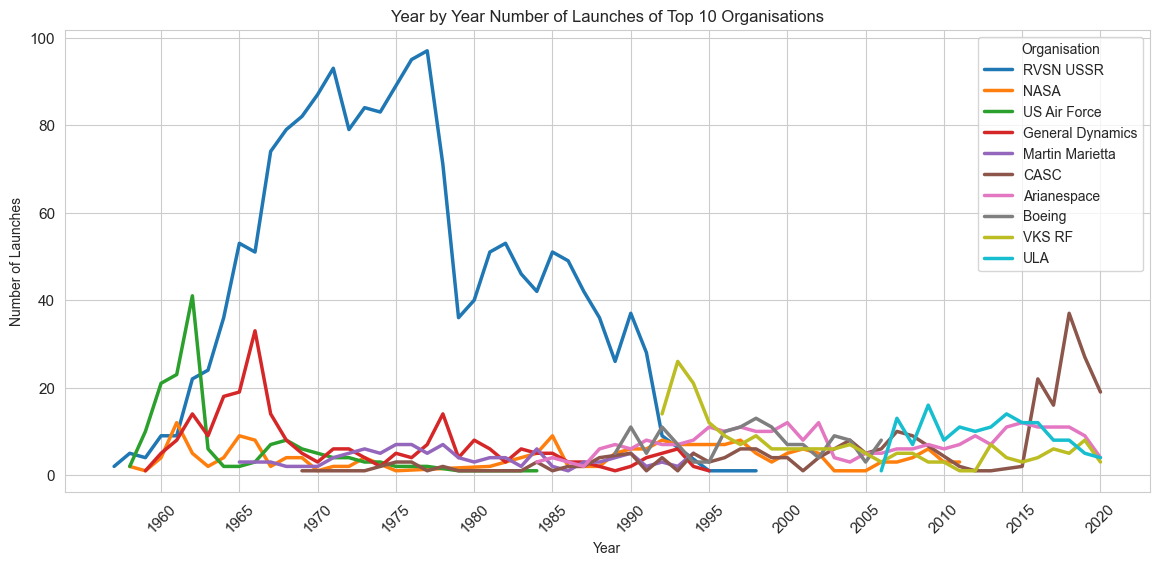

In [119]:
plt.figure(figsize=(14, 6)) 
plt.title('Year by Year Number of Launches of Top 10 Organisations', fontsize=12)
plt.xticks(ticks=np.arange(1960, 2021, step=5), fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.ylabel("Number of Launches")

sns.lineplot(data=top_10_org , 
             x="Year", 
             y='Mission_Status',
             hue="Organisation",
             legend = "auto",
             linewidth = 2.5)
sns.set_style("whitegrid")

plt.show()

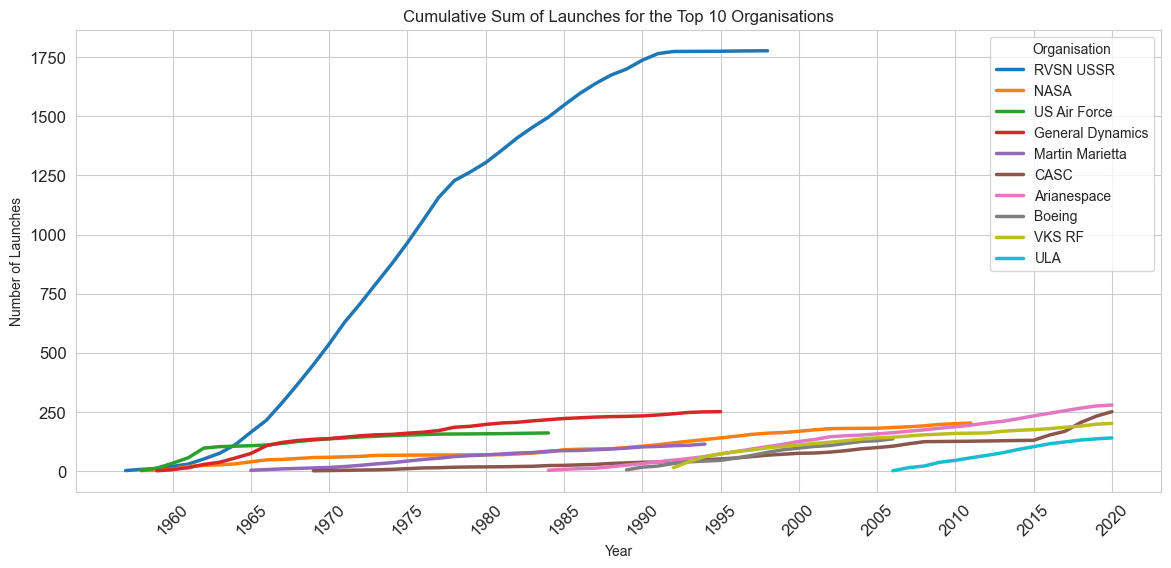

In [120]:
plt.figure(figsize=(14, 6)) 
plt.title('Cumulative Sum of Launches for the Top 10 Organisations', fontsize=12)
plt.xticks(ticks=np.arange(1960, 2021, step=5), fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel("Number of Launches")

sns.lineplot(data=cumulative_launches, 
             x="Year", 
             y='Mission_Status',
             hue="Organisation",
             legend = "auto",
             linewidth = 2.5)


plt.show()

### Number of Launches over Time by the Top 10 Countries 

In [79]:
organisation_related_country.index[:10]

Index(['Russian Federation', 'USA', 'France', 'China', 'Japan', 'India',
       'Russian Federation, USA', 'Norway, Russian Federation, Ukraine, USA',
       'Russian Federation, Ukraine, Kazakhstan', 'Iran'],
      dtype='object', name='Organization_Country')

In [80]:
top_10_countries = organisation_related_country.index[:10]

In [81]:
filtered_df = clean_df[clean_df["Organization_Country"].isin(top_10_countries)]

In [82]:
top_10_countr = filtered_df.groupby(["Year", "Organisation", "Organization_Country"], as_index=False).count()

In [83]:
# Create a series that has the cumulative sum for the number of launches.

cumulative_country_launches = top_10_countr.groupby(by=["Year", "Organisation", "Organization_Country"]).sum().groupby(level=[2]).cumsum()
cumulative_country_launches.reset_index(inplace=True)

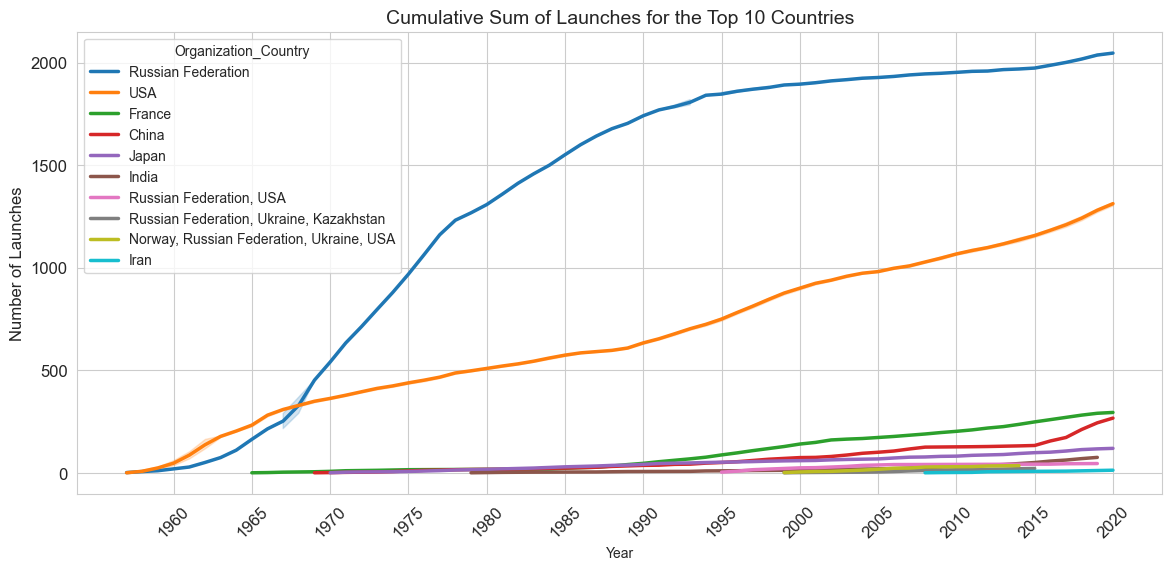

In [84]:
plt.figure(figsize=(14, 6)) 
plt.title('Cumulative Sum of Launches for the Top 10 Countries', fontsize=14)
plt.xticks(ticks=np.arange(1960, 2021, step=5), fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
ax1.set_ylim(bottom=0, top=2100)
ax1.set_xlim([1960, 2021])

sns.lineplot(data=cumulative_country_launches, 
             x="Year", 
             y='Mission_Status',
             hue="Organization_Country",
             legend = "auto",
             linewidth = 2.5)


plt.savefig('plot.png', dpi=300)

In [85]:
top_10_countr = filtered_df.groupby(["Organisation", "Organization_Country"], as_index=False).count()

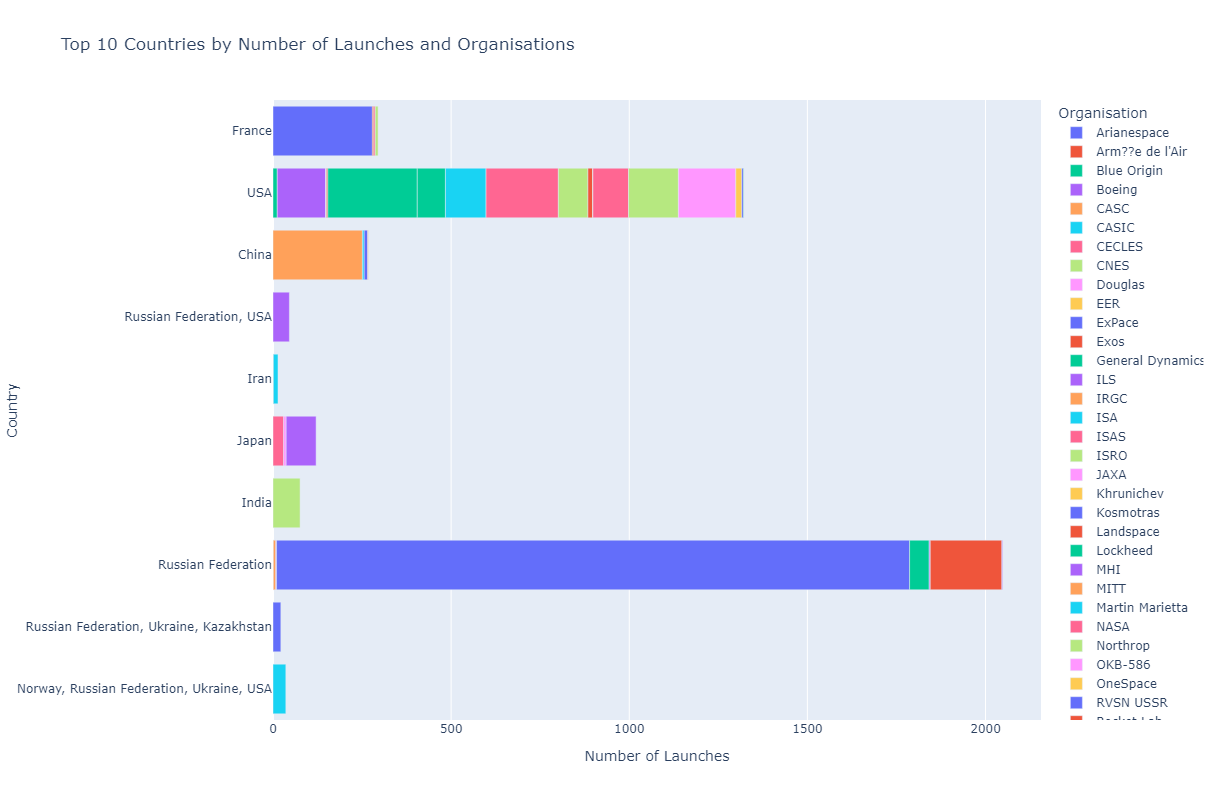

In [121]:
# Define the columns to include in hover data
hover_columns = ['Organisation', 'Organization_Country', 'Mission_Status']


org_counrtry_bar = px.bar(top_10_countr,
                          x=top_10_countr.Mission_Status,
                          y=top_10_countr.Organization_Country,
                          color=top_10_countr.Organisation,
                          orientation='h',
                          title='Top 10 Countries by Number of Launches and Organisations',
                          custom_data=hover_columns,  # Include only the desired columns in hover data
                          # animation_group = top_10_countr.Year,
)

org_counrtry_bar.update_layout(xaxis_title='Number of Launches',
                               yaxis_title='Country',
                               height=800,  # Adjust the height of the figure
                               width=1100   # Adjust the width of the figure
)

# Customize hover template to display only desired columns
hover_template = '<b>%{customdata[0]}</b> <br>' \
                 '<b>Country:</b> %{customdata[1]}<br>' \
                 '<b>Number of Launches:</b> %{customdata[2]}<extra></extra>'

org_counrtry_bar.update_traces(hovertemplate=hover_template)

# Invert the y-axis
org_counrtry_bar.update_yaxes(autorange="reversed")

org_counrtry_bar.show()

In [ ]:
%%html
<div>
    <img src="assets/org_counrtry_bar.png"/>
</div>

## Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [87]:
cold_war = clean_df.loc[(clean_df.Year < 1992) & (clean_df.Organization_Country.isin(["USA", "Russian Federation"]))]

### The total number of launches of the USSR and the USA


In [88]:
launch_num = cold_war.groupby("Organization_Country")['Mission_Status'].count()
launch_num

Organization_Country
Russian Federation    1770
USA                    660
Name: Mission_Status, dtype: int64

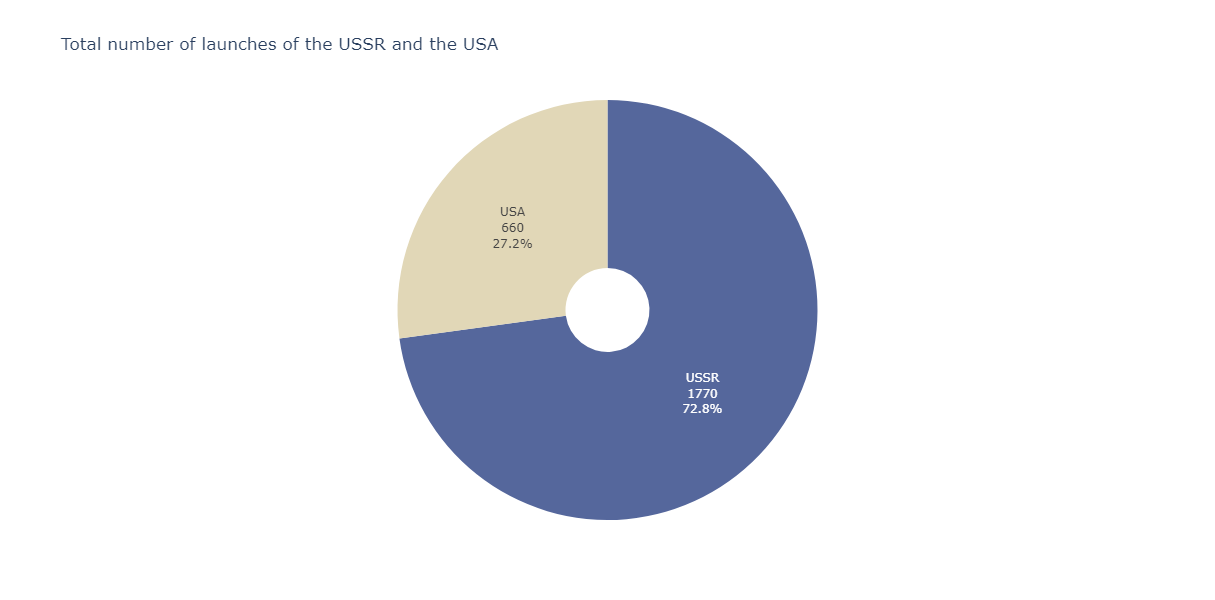

In [123]:
color_map_status = {
    'Russian Federation': '#55679C',
    'USA': '#E1D7B7'
}

ussr_usa_launches = px.pie(
    values=launch_num.values,
    title='Total number of launches of the USSR and the USA',
    hole=0.2,
    names= ["USSR", "USA"],
    color = launch_num.index,
    color_discrete_map=color_map_status,
    width=600,  
    height=600   
)

ussr_usa_launches.update_traces(
    textinfo='label+percent+value', 
    textposition='inside'
)


ussr_usa_launches.update_layout(
    uniformtext_minsize=14,
    showlegend=False)

ussr_usa_launches.show()

In [ ]:
%%html
<div>
    <img src="assets/ussr_usa_launches.png"/>
</div>

### Total Number of Launches Year-On-Year by the Two Superpowers

In [90]:
num_year_launches = cold_war.groupby(["Year", "Organization_Country"], as_index=False).agg({"Mission_Status": pd.Series.count})


In [91]:
cold_war_total_year_launch = px.line(num_year_launches, x="Year", y='Mission_Status', color="Organization_Country",
              title='Total Number of Launches Year-On-Year',
              markers=True)

cold_war_total_year_launch.update_layout(xaxis_title='Year', yaxis_title='Number of Launches', legend_title_text='', width=1100, height=500)
cold_war_total_year_launch.for_each_trace(lambda t: t.update(name={'Russian Federation': 'USSR','USA': "USA"}[t.name]))
cold_war_total_year_launch.show()

In [ ]:
%%html
<div>
    <img src="assets/cold_war_total_year_launch.png"/>
</div>

### Chart the Total Number of Mission Failures Year on Year.

In [92]:
num_fail_launches = cold_war.loc[cold_war.Mission_Status.isin(["Failure", "Partial Failure", "Prelaunch Failure"])]
num_fail_launches = num_fail_launches.groupby(["Year", "Organization_Country"], as_index=False).agg({"Mission_Status": pd.Series.count})

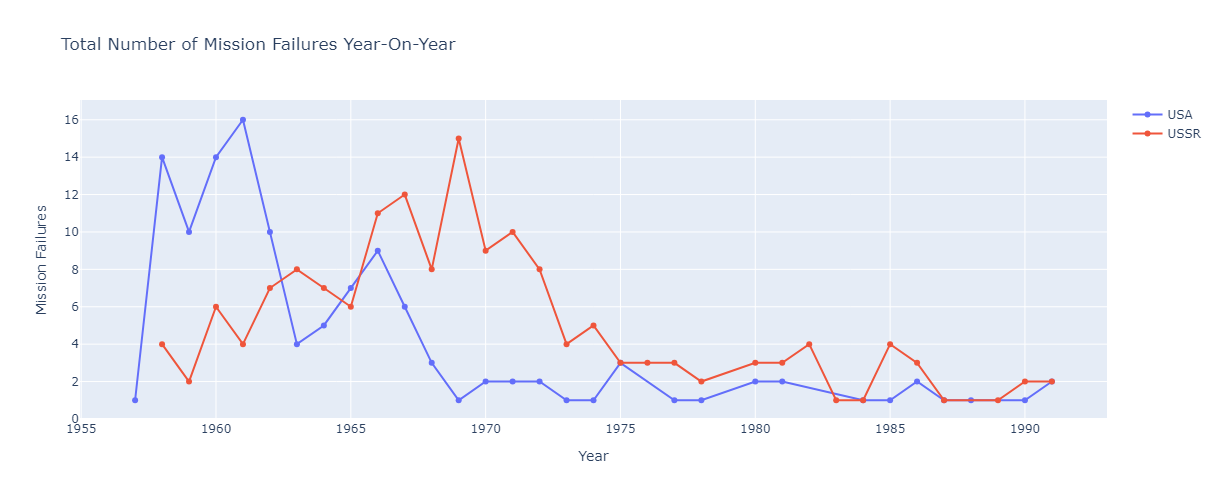

In [124]:
cold_war_total_year_fails = px.line(num_fail_launches, x="Year", y='Mission_Status', color="Organization_Country",
              title='Total Number of Mission Failures Year-On-Year',
              markers=True)

cold_war_total_year_fails.update_layout(xaxis_title='Year', yaxis_title='Mission Failures', legend_title_text='', width=1100, height=500)
cold_war_total_year_fails.for_each_trace(lambda t: t.update(name={'Russian Federation': 'USSR','USA': "USA"}[t.name]))
cold_war_total_year_fails.show()

In [ ]:
%%html
<div>
    <img src="assets/cold_war_total_year_fails.png"/>
</div>

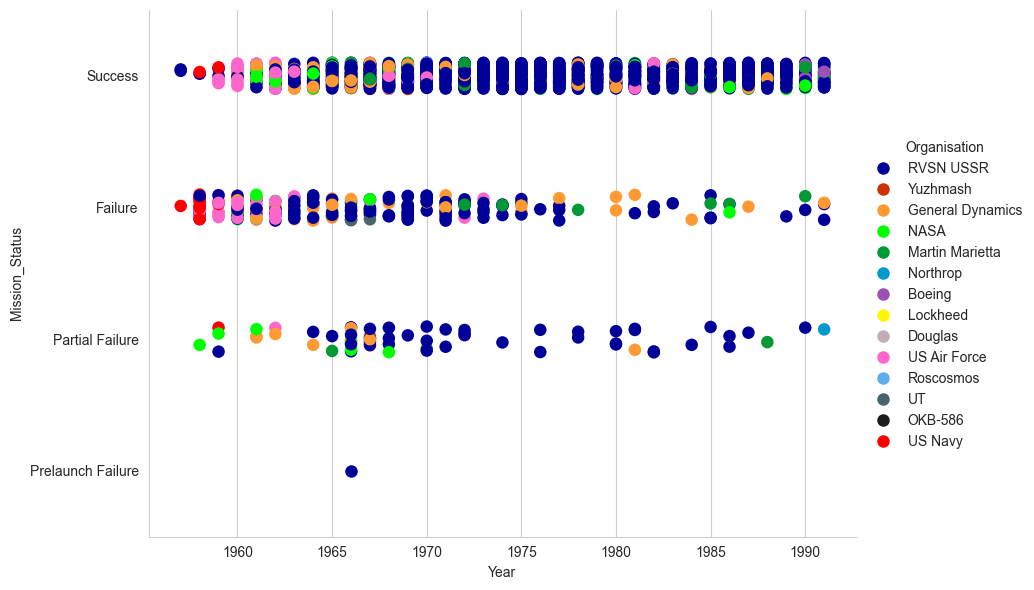

In [127]:
custom_palette = {'RVSN USSR': '#000099', 'US Navy' : "#ff0000", 'NASA': "#00ff00", 'US Air Force': "#ff66cc", 'General Dynamics': "#ff9933",
       'Martin Marietta': "#009933" , 'UT': "#4A646C", 'OKB-586': "#1B1B1B", 'Yuzhmash': "#cc3300", 'Roscosmos': "#5DADEC",
       'Boeing':"#9C51B6", 'Douglas': "#BFAFB2", 'Lockheed':"#FFF700", 'Northrop':"#0099cc"}

cold_war_catplot_fails = sns.catplot(data=cold_war, x="Year", y="Mission_Status", hue="Organisation",
            palette=custom_palette,
            height=6, 
            aspect=1.5, 
            kind="strip",
            size=9)


In [ ]:
%%html
<div>
    <img src="assets/cold_war_catplot_fails.png"/>
</div>

### Total Number of Successful Launches 

Do the results change if we only look at the number of successful launches? 

In [95]:
num_succ_launches = cold_war.loc[cold_war.Mission_Status == "Success"]
num_succ_launches = num_succ_launches.groupby(["Year", "Organization_Country"], as_index=False).agg({"Mission_Status": pd.Series.count})

In [96]:
cold_war_succ_launch = px.line(num_succ_launches, x="Year", y='Mission_Status', color="Organization_Country",
              title='Total Number of Successful Launches Year-On-Year',
              markers=True)

cold_war_succ_launch.update_layout(xaxis_title='Year', yaxis_title='Mission Success', legend_title_text='', width=1100, height=500)
cold_war_succ_launch.for_each_trace(lambda t: t.update(name={'Russian Federation': 'USSR','USA': "USA"}[t.name]))
cold_war_succ_launch.show()

<Figure size 640x480 with 0 Axes>

In [97]:
%%html
<div>
    <img src="assets/cold_war_succ_launch.png"/>
</div>

### Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [98]:
launch_organisation = cold_war.groupby(["Year", "Organisation"], as_index=False).agg({"Mission_Status": pd.Series.count})

In [99]:
launch_organisation["Organisation"].unique()

array(['RVSN USSR', 'US Navy', 'NASA', 'US Air Force', 'General Dynamics',
       'Martin Marietta', 'UT', 'OKB-586', 'Yuzhmash', 'Roscosmos',
       'Boeing', 'Douglas', 'Lockheed', 'Northrop'], dtype=object)

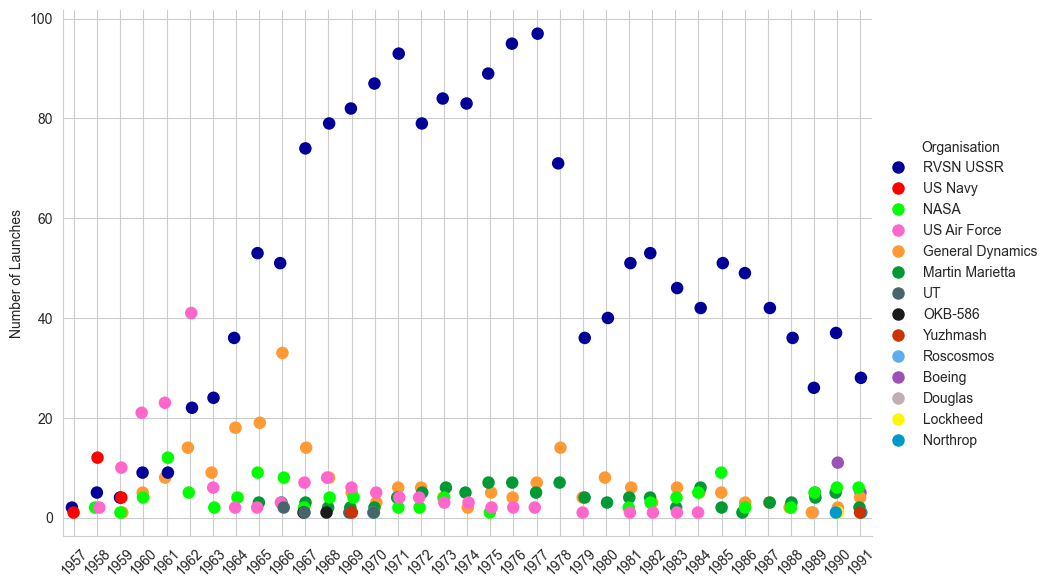

In [129]:
custom_palette = {'RVSN USSR': '#000099', 'US Navy' : "#ff0000", 'NASA': "#00ff00", 'US Air Force': "#ff66cc", 'General Dynamics': "#ff9933",
       'Martin Marietta': "#009933" , 'UT': "#4A646C", 'OKB-586': "#1B1B1B", 'Yuzhmash': "#cc3300", 'Roscosmos': "#5DADEC",
       'Boeing':"#9C51B6", 'Douglas': "#BFAFB2", 'Lockheed':"#FFF700", 'Northrop':"#0099cc"}

org_launch_num_cold_war = sns.catplot(data=launch_organisation, x="Year", y="Mission_Status", hue="Organisation",
                       palette=custom_palette, 
                       height=6, 
                       aspect=1.5, 
                       kind="strip",
                       size=9)

org_launch_num_cold_war.set_xticklabels(rotation=45)
org_launch_num_cold_war.set_axis_labels("", "Number of Launches")
org_launch_num_cold_war.ax.grid(True) 


In [101]:
%%html
<div>
    <img src="assets/org_launch_num_cold_war.png"/>
</div>